# Converting prices to returns
Many of the models and approaches used for time series modeling require the time series to be stationary. 

Stationarity assumes that the statistics (mathematical moments) of a process, such as the series’ mean and variance, do not change over time. Using that assumption, we can build models that aim to forecast the future values of the process.




In [12]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
filename_1d = "..\\..\\data\\moex\\SBER_200101_240530.csv"
filename_1h = "..\\..\\data\\moex\\SBER_240205_240603.csv"

dtype={
    '<TICKER>': 'string',
    '<PER>': 'string',
    '<DATE>': 'string',
    '<TIME>': 'string',
    '<OPEN>': 'float',
    '<HIGH>': 'float',
    '<LOW>': 'float',
    '<CLOSE>': 'float',
    '<VOLUME>': 'float',
}

df = pd.read_csv(filename_1d, delimiter=";", decimal=".", dtype=dtype)
df['timestamp'] = pd.to_datetime(df['<DATE>'] + ' ' + df['<TIME>'], format='%y%m%d %H%M%S')
df.drop(['<DATE>', '<TIME>', '<PER>', '<TICKER>'], axis=1, inplace=True)
df.set_index('timestamp', inplace=True)
df.rename(columns= {'<OPEN>' : 'open', '<HIGH>' : 'high', '<LOW>' : 'low', '<CLOSE>' : 'close', '<VOL>' : 'volume'}, inplace=True)
df.head()

,open,high,low,close,volume
timestamp,,,,,
2020-01-03,255.97,258.19,253.70,255.00,35824160
2020-01-06,254.75,254.84,251.40,253.90,22327940
2020-01-08,253.62,259.15,253.03,259.15,40736030
2020-01-09,259.41,261.76,257.01,257.99,38196300
2020-01-10,257.91,259.25,256.88,258.19,18841650


In [20]:
df = df.loc[:, ['close']]
df["simple_rtn"] = df.close.pct_change()
df["log_rtn"] = np.log(df.close/df.close.shift(1))

df.head()

,close,simple_rtn,log_rtn
timestamp,,,
2020-01-03,255.00,NaN,NaN
2020-01-06,253.90,-0.004314,-0.004323
2020-01-08,259.15,0.020677,0.020467
2020-01-09,257.99,-0.004476,-0.004486
2020-01-10,258.19,0.000775,0.000775


# Changing the frequency of time series data


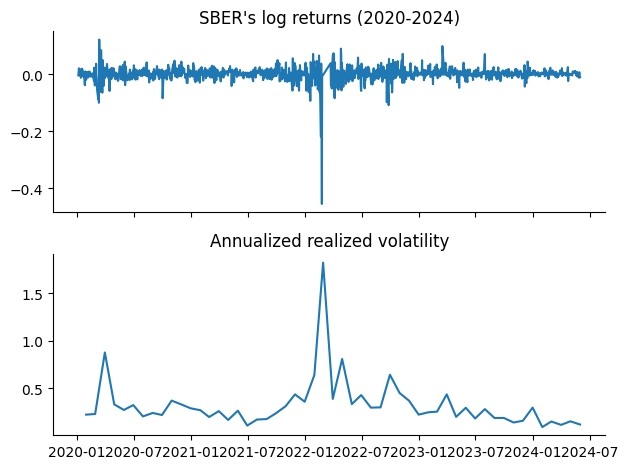

In [26]:
# Define the function for calculating the realized volatility:
def realized_volatility(x):
    return np.sqrt(np.sum(x**2, axis=0))

# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
# Calculate monthly realized volatility:
df_rv = (
    df.loc[:, ['log_rtn']].groupby(pd.Grouper(freq="ME"))
    .apply(realized_volatility, )
    .rename(columns={"log_rtn": "rv"})
)

# Annualize the values:
df_rv.rv = df_rv["rv"] * np.sqrt(12)

# Plot the results:
ig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df.log_rtn)
ax[0].set_title("SBER's log returns (2020-2024)")
ax[1].plot(df_rv.rv)
ax[1].set_title("Annualized realized volatility")
sns.despine()
plt.tight_layout()

#df_rv
